<a class="anchor" id="home"><img src="Images/frangiPANe.png" width=50% align=right></a>

***

# <span style="color: #3987C4;">Table of contents</span>
<a class="anchor" id="home"></a>

[I - What is frangiPANe?](#whatabout)

* [Map-then-assembly approach](#approach)
* [Requirements](#requirements)
* [Data test](#datatest)
* [License](#license)
    
[II - Preparing frangiPANe analysis](#howtoconfigure)
* [Import python packages used by frangiPANe](#importpackages)
* [Definition of input data used by frangiPANe workflow](#configinput)
* [Creating frangiPANe output directory](#outputdir)
* [Creating log file](#logfile)
* [Preparing Genome Reference for next analysis](#reference)
* [Analyzing Group File](#group)
    
[III - Workflow](#workflow)
* [1 - Stats about raw data](#rawdata)
* [2 - Mapping the individuals reads against the reference genome](#mapping)
* [3 - Assembly of the individuals' reads that do not map (properly paired) on the reference genome](#assembly)
* [4 - Removing Contamination](#contamination)
* [5 - Reducing Sequence Redundancy](#redundancy)
* [6 - Anchoring Clusters on reference genome](#anchoring)

***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")

# <span style="color: #3987C4;"> I - What is frangiPANe ?  <a class="anchor" id="whatabout"></a></span>

This tool allows the generation of a linear panreference, from paired-end short-reads and a reference genome using a Map-Then-Assembly approach.

<img src="Images/frangiPANe_overview.jpg" width=70%>

### <span style="color: #919395"> _Map-then-assembly approach_ <a class="anchor" id="approach"></a></span>

<img src="Images/approachMapThenAssembly.jpg" width=80%>

### <span style="color: #919395"> _Data test_ <a class="anchor" id="datatest"></a></span>

<details>


#### __Rice__ 

##### _Illumina sequenced dataset_

3 African Rice whole-genome sequences (Cubry and al., 2018) were used (paired-end illumina, 2x101bp, ~35X) :

* AA, _O. barthii_ (African Rice wild)
* AB, _O. barthii_ (African Rice wild)
* DT, _O. glaberrima_ (African Rice cultivated)

><sub><sup>Cubry P, Tranchant-Dubreuil C, Thuillet AC, Monat C, Ndjiondjop MN, Labadie K, Cruaud C, Engelen S, Scarcelli N, Rhoné B, Burgarella C, Dupuy C, Larmande P, Wincker P, François O, Sabot F, Vigouroux Y. The Rise and Fall of African Rice Cultivation Revealed by Analysis of 246 New Genomes. Curr Biol. 2018 Jul 23;28(14):2274-2282.e6. doi: 10.1016/j.cub.2018.05.066. Epub 2018 Jul 5. PMID: 29983312.</sub></sup>

##### _Genome Reference_

_Oryza glaberrima_ (OMAPv2 sequence, ref)

</details>

### <span style="color: #919395">_Requirements_ <a class="anchor" id="requirements"></a></span>

<details>

* python version

* Python modules used
    * os, io, subprocess
    * Ipython
    * ipywidgets
    * trailets
    * tkinter
    * numpy, pandas
    * matplotlib
    * seaborn
    * panel
    
* Bioinformatics software (version)
    * ea-utils (fastq-stats [doc] (https://expressionanalysis.github.io/ea-utils/)] : Command-line tools for processing biological sequencing data. 
    * BWA [[doc](http://bio-bwa.sourceforge.net/bwa.shtml), [github](https://github.com/lh3/bwa)] : software package for mapping DNA sequences against a large reference genome
    * Samtools [[doc](http://www.htslib.org/doc/samtools.html)] : suite of programs for interacting with high-throughput sequencing data : http://www.htslib.org/download/
    * ABySS [[github](https://github.com/bcgsc/abyss)] : de novo sequence assembler intended for short paired-end reads and large genomes
    * assembly-stats [[github](https://github.com/sanger-pathogens/assembly-stats)] 
    * cd_hit [[github](https://github.com/weizhongli/cdhit/blob/master/doc/cdhit-user-guide.wiki)]

</details>

### <span style="color: #919395">_License_ <a class="anchor" id="license"></a></span>

* Licencied under CeCill-C (http://www.cecill.info/licences/Licence_CeCILL-C_V1-en.html) and GPLv3
* Intellectual property belongs to IRD, ... and SouthGreen development platform
* Written by Clothilde Chenal and Christine Tranchant-Dubreuil
* Copyright 2021

from IPython.display import Javascript
Javascript("Jupyter.notebook.execute_cells([2])")nts/These/frangiPANeGIT/ricents/These/frangiPANeGIT/ricents/These/frangiPANeGIT/rice***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")

# <span style="color: #3987C4;">II - Preparing frangiPANe analysis <a class="anchor" id="howtoconfigure"></a></span>

### <span style="color: #919395"> _Import python packages used by frangiPANe_ </span>

In [1]:
from tools.jupyter import *
from tools.frangiPANe import *

import panel as pn

pn.extension()

add_css()

file_saved="frangiPANe.p"
text = "Import all python packages required successfully"
output_dir = None
output_mapping_dir = None
total_genome_size= None
k = None
display_alert(text,"success")
bgc('LightBlue')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395"> _Definition of input data used by frangiPANe workflow_  <a class="anchor" id="configinput"></a></span>

<details>

* __Project Name__ : the directory name that will contain all the results generated by this analysis
* __Output Directory__ : the parent directory that will contain the __project_name__ directory
* __Fastq Directory__ : the directory that contains .fastq files of all the individuals
* __Reference File__ : the reference genome used to map all reads (fastq files). The reference genome have to be provided in a fasta format. The reference genome must be indexed by BWA for subsequent analyzes. The **REF**.amb, **REF**.ann, **REF**.bwt, **REF**.pac and **REF**.sa files are created.)
* __Group File__ :  (It is common for several individuals to have different origins when building a pangenome. To exploit this diversity in the results, PANtoum needs a tabulated file (separator = tabulation, no header); the first column corresponds to the name of the individuals (should correspond to .fastq files) and the second to the group they belong. NB : It is possible to use only one group.)

ex of samples with 2 groups : wild or cultivated
    
| sample  | group  |
|---|---|
| AA | wild | 
| AB  | wild | 
| CB  | cultivated |

</details>

Run the following cell and fill the parameters box

In [2]:
project_name, out_dir, ref_file, vec_file, group_file, fastq_dir,cpus = box_config()
bgc('LightBlue')

WidgetBox(background='#E3ECF1')
    [0] Markdown(str)
    [1] Column(width=800)
        [0] Row
            [0] TextInput(name='Project name :', placeholder='Enter the name here...')
            [1] TextInput(name='Output directory :', placeholder='Enter the directory p...)
        [1] TextInput(name='Fastq directory', placeholder='Enter the directory p...)
        [2] TextInput(name='Group file', placeholder='Enter the file p...)
        [3] TextInput(name='Reference file', placeholder='Enter the file p...)
        [4] TextInput(name='Univec file', placeholder='Enter the file p...)
        [5] IntSlider(end=36, name='CPU number', start=1, value=6)
        [6] Row
            [0] Button(button_type='primary', name='SAVE', width=100)
            [1] Button(button_type='primary', name='LOAD', width=100)
            [2] Button(button_type='primary', name='INIT', width=100)
        [7] Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], height=200, margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395">_Creating frangiPANe output directory_<a class="anchor" id="outputdirectory"></a></span>

<img src="Images/frangiPANe_output_tree.jpg">

Be careful : if the directory already exists, files and directory that were generated by previous analysis could be removed by new analysis steps

In the log file,  all outputs generated by bioinformatics tools (eg: bwa index, mem, abyss) are saved

In [3]:
if not out_dir.value:
    text = "Fill the form in the previous cell !"
    display_alert(text,"danger")
else:
    cpu = cpus.value
    output_dir = out_dir.value + "/frangiPANe_" + project_name.value
    make_dir(output_dir)
    logger = init_log(output_dir,project_name.value)
    df_group = None
bgc('LightBlue')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395">_Preparing Genome Reference for next analysis_

#### __Genome indexation__ and __Genome dashboard__

This step is done with `bwa index` if index are absent. Indexation is required before performing reads mapping against genome reference.

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both')
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Matplotlib(Figure)
        [1] DataFrame(DataFrame)
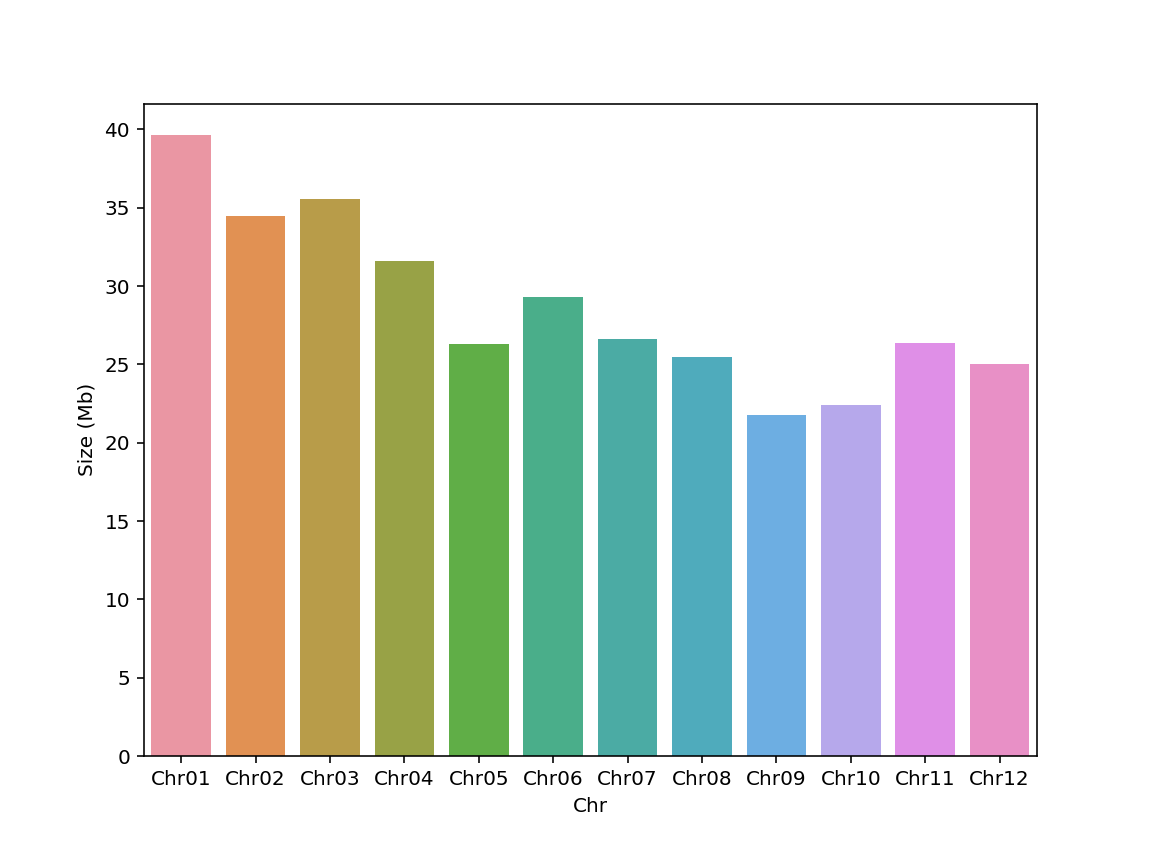

In [4]:
if not ref_file.value:
    text = "Fill the form with the reference file in the previous cell !"
    display_alert(text,"danger")
elif not output_dir:
    text = "Creating frangiPANe output directory is required to continue !"
    display_alert(text,"danger")
else:
    index_reference_genome(ref_file.value, logger)
    total_genome_size=dashboard_genome(ref_file.value)
bgc('LightBlue')

### <span style="color: #919395">_Analyzing Group File_</span> 

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')


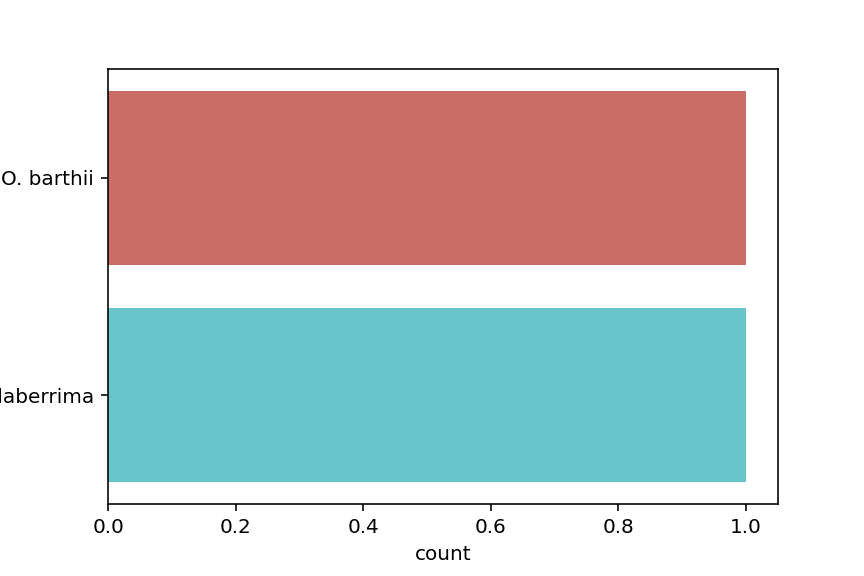

In [5]:
if not group_file.value:
    text = "Fill the form with the group file in the previous cell !"
    display_alert(text,"danger")
elif not output_dir:
    text = "Creating frangiPANe output directory is required to continue !"
    display_alert(text,"danger")
else:
    # Reading group file
    id_dict, df_group = read_group_file(group_file.value,logger)
    # Group file dashboard
    dashboard_group(df_group)
bgc('LightBlue')

***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")


# <span style="color: #3987C4;">III - frangiPANe Workflow <a class="anchor" id="workflow"></a></span>

<img src="Images/approachMapThenAssembly.jpg" width=60%>



Only fastq files corresponding to samples described in the group file (contained in fastq directory) will be used in this workflow.

Fastq naming convention: 
* sample_code_1.fastq, sample_code_R1.fastq
* sample_code_1.fq, sample_code_R1.fq
* sample_code_2.fastq, sample_code_R2.fastq
* sample_code_2.fq, sample_code_R2.fq

with sample_code read from the group file (1st column)

### <span style="color: #919395"> _1 - Stats about raw data (fastq files)_

#### __Generating fastq statistics with `fastq_stats`__

After this stat analysis, several files have been created and saved into 00_fastq_stats directory :
* one file (fastq-stat) by fastq file
* one file with all stats : all_fastq-stats.csv

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Row(width=800)
        [0] Markdown(str)
        [1] Spacer(sizing_mode='stretch_both', width=100)
        [2] Markdown(str)
    [2] Row(width=800)
        [0] Markdown(str)
        [1] Spacer(sizing_mode='stretch_both', width=100)
        [2] Matplotlib(Figure)
    [3] Row(width=800)
        [0] Markdown(str)
        [1] Spacer(sizing_mode='stretch_both', width=100)
        [2] Matplotlib(Figure)
    [4] Row(width=800)
        [0] Markdown(str)
        [1] Spacer(sizing_mode='stretch_both', width=100)
        [2] Matplotlib(Figure)
    [5] Row(width=800)
        [0] Markdown(str)
        [1] Spacer(sizing_mode='stretch_both', width=100)
        [2] Matplotlib(Figure)
    [6] Row(width=800)
        [0] Markdown(str)
        [1] Spacer(sizing_mode='stretch_both', width=100)
        [2] Matplotlib(Figure)
    [7] DataFrame(DataFrame, width=800)
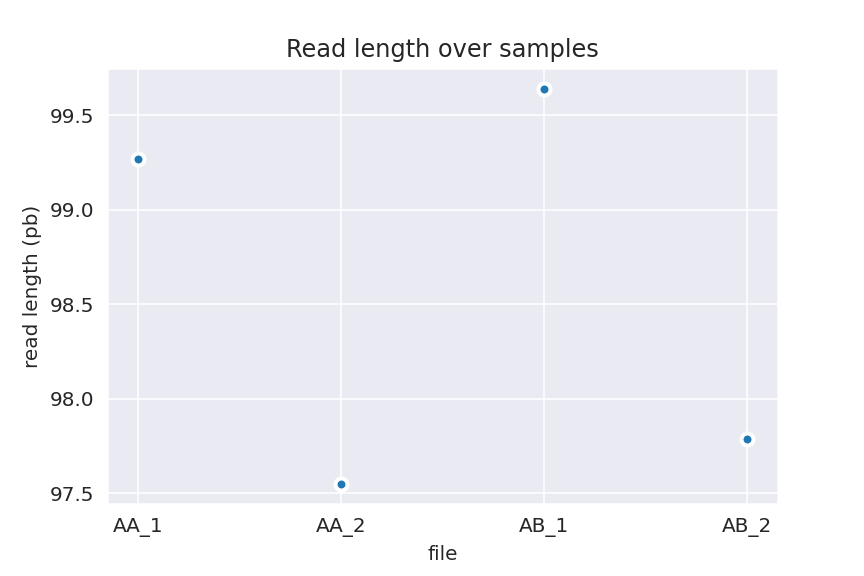
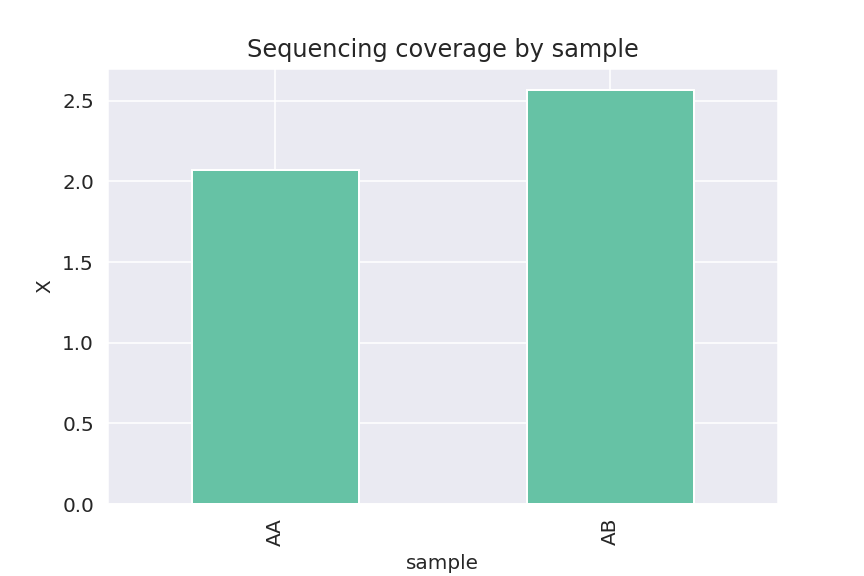
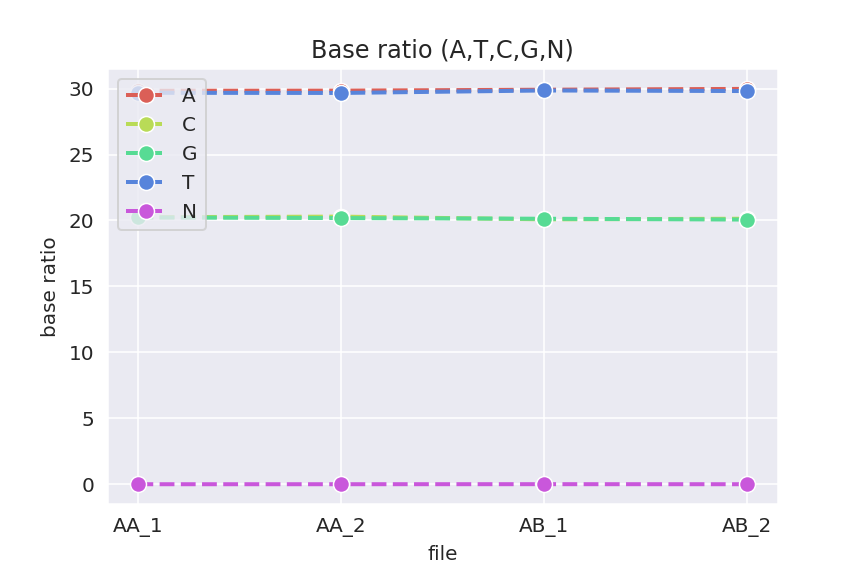
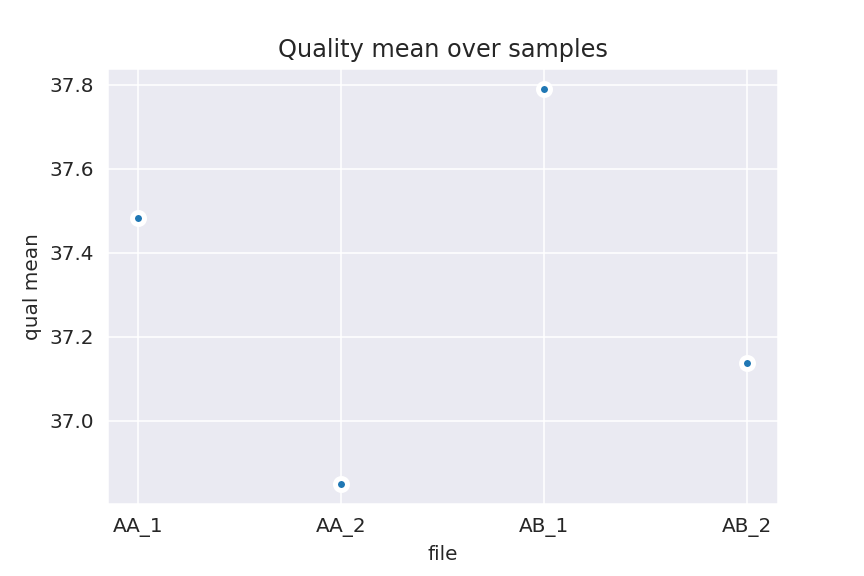
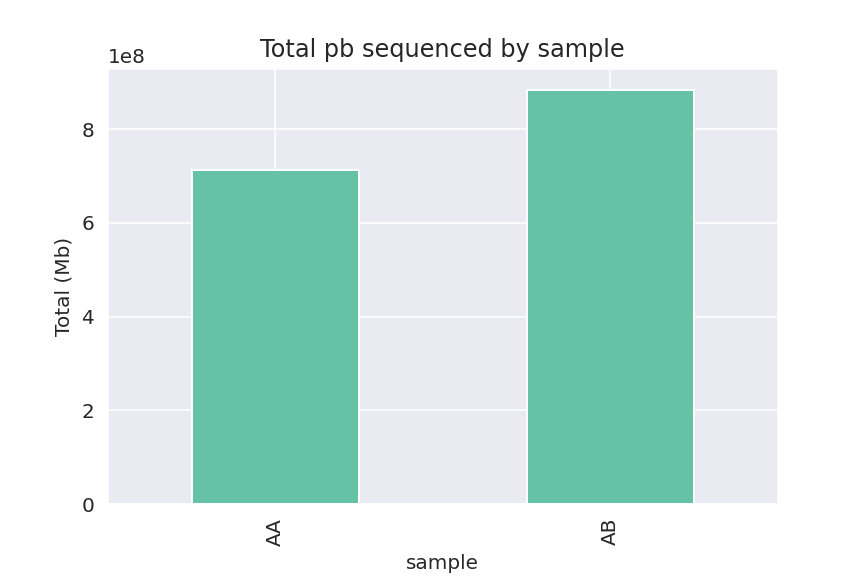

In [6]:
if df_group is None:
    text = "Analyzing Group File is required to continue !"
    display_alert(text,"danger")
    
elif not fastq_dir.value:
    text = "Fill the form with the fastq directory in the previous cell !"
    display_alert(text,"danger")

elif not output_dir:
    text = "Creating frangiPANe output directory is required to continue !"
    display_alert(text,"danger")
elif not total_genome_size:
    text = "Genome indexation and _Genome dashboard is required to continue !"
    display_alert(text,"danger")
else:
    # Creating directory
    stat_dir = os.path.join(output_dir,"00-fastq_stats")
    fastqstat_csv=os.path.join(stat_dir,"all_fastq-stats.csv")
    
    # run fastq_stats
    fastq_stats_dir(fastq_dir.value, stat_dir, df_group, logger)

    # merging all files generated by fastq_sample
    merge_fastqstat(fastqstat_csv, stat_dir,logger)

    #Raw data dashboard
    dashboard_fastq(fastqstat_csv,total_genome_size,df_group)

bgc('LightBlue')

### <span style="color: #919395">_2 - Mapping the individuals reads against the reference genome_  <a class="anchor" id="mapping"></a></span>


#### __Mapping with `BWA mem` <a class="anchor" id="mappingbwa">__


In [7]:
if not output_dir:
    text = "Creating frangiPANe output directory is required to continue !"
    display_alert(text,"danger")
elif df_group is None:
    text = "Analyzing Group File is required to continue !"
    display_alert(text,"danger")
elif not ref_file.value or not fastq_dir.value:
    text = "Fill the form with the group file in the previous cell !"
    display_alert(text,"danger")
else:
    # Creating directory
    output_mapping_dir = os.path.join(output_dir,"01-mapping_against_reference")

    # Mapping
    fastq2bam_dir(ref_file.value, fastq_dir.value, df_group, cpu, output_mapping_dir, logger)
    
    bgc('LightBlue')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Generating mapping stats <a class="anchor" id="mappingstat">__
    
Statistics are generated by `samtools flagstat` and they are saved into the directory _01_mapping-against_reference_ and the subdirectory _stat_

* One "flagtstat file" is generated for each bam file (http://www.htslib.org/doc/samtools-flagstat.html).

* _all_flagstat.csv_ file compiling all the stats


Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [4] Markdown(str)
    [5] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [6] Markdown(str)
    [7] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [8] Matplotlib(Figure)
    [9] Row
        [0] MultiChoice(margin=(0, 20, 0, 0), name='Group', options=['O. barthii', ...])
        [1] MultiChoice(margin=(0, 20, 0, 0), name='Sample', options=['AA', 'AB'])
    [10] ParamFunction(function, max_height=400, width=400)
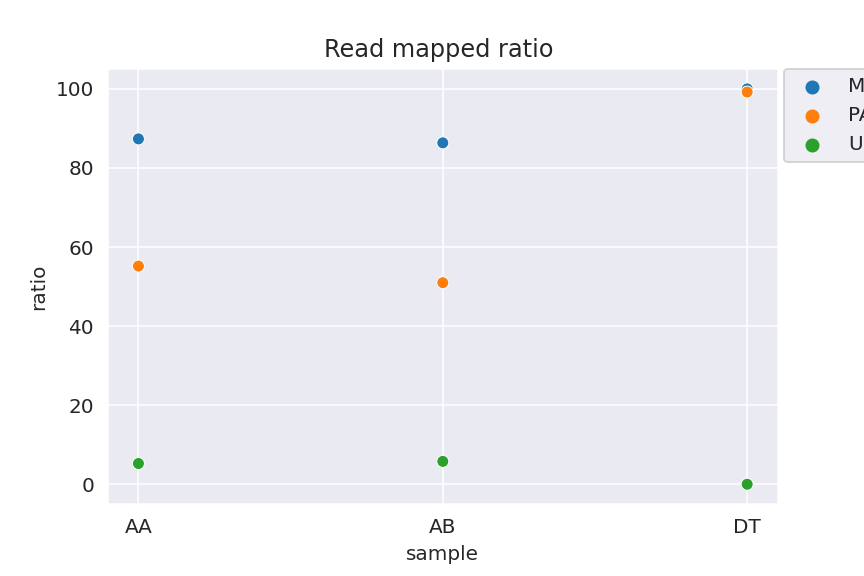

In [8]:
if not output_mapping_dir:
    text = "Previous cell ...Mapping with bwa mem... has to be executed even if the mapping were already done !"
    display_alert(text,"danger")
else :    
    stat_dir = os.path.join(output_mapping_dir,"stat")
    make_dir(stat_dir)

    logger.info(f"MAPPING STAT :")
    logger.info(f"\t\tMapping stat directory : {stat_dir}")

    for file_name in os.listdir(output_mapping_dir):
        if ".bam" in file_name:
            samtools_flagstat(os.path.join(output_mapping_dir,file_name), stat_dir,logger)

    #### __Compiling stats into a unique tabulated file__
    merge_flagstat(output_dir=stat_dir, logger=logger)
    #add_variable(file,'dash_mappingStat',1)

    ### Dashboard
    stat_file = os.path.join(stat_dir,"all_flagstat.csv")
    dashboard_flagstat(stat_file,df_group)

bgc('LightBlue')

In [9]:
# Creating subdirectory
output_filtered_bam = os.path.join(output_mapping_dir,"bam_F0x2")
make_dir(output_filtered_bam)

# Get unmapped reads only
bam_to_F0x2_bam_dir(output_mapping_dir,id_dict, cpu, output_filtered_bam, logger)

bgc('LightBlue')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")


### <span style="color: #919395">3 - Assembly of the individuals' reads that do not map (properly) on the reference genome <a class="anchor" id="assembly"></a></span>

#### __Extracting unmapped reads with `samtools view`__ 

Options de samtools view : -b -h -F -@ -o

#### __ABYSS test to choose k-mer value__

#### _Choosing optimal k_


In [11]:
k,step,accession,length = box_config_abyss(df_group)
bgc('LightBlue')

WidgetBox(background='#E3ECF1')
    [0] Markdown(str)
    [1] Column(width=800)
        [0] Row
            [0] RangeSlider(end=92, name='K-mer length', start=24, step=4, value=(64, 68))
            [1] IntInput(end=10, name='Step', start=1, value=4)
        [1] MultiSelect(name='Accession', options=['AA', 'AB'], value=['AA', 'AB'])
        [2] IntInput(end=10000, name='Minimal length t..., start=100, step=100, value=300)
        [3] Row
            [0] Button(button_type='primary', name='SAVE', width=100)
            [1] Button(button_type='primary', name='INIT', width=100)
        [4] Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], height=200, margin=(0, 0, 25, 0), sizing_mode='stretch_width')

##### Execute Abyss with several k

TODO : ADD TEST TO REMOVE ADDITIONAL SAMPLES FROM PREVIOUS RUNS + test if k filled

In [12]:
output_assembly_dir = os.path.join(output_dir,"02-assembly_unmapped_reads")
make_dir(output_assembly_dir)
    
output_assembly_test= os.path.join(output_assembly_dir,"01-choosing_k")
make_dir(output_assembly_test)

output_assembly_fasta = os.path.join(output_assembly_test,"fasta")
make_dir(output_assembly_fasta)

if not accession.value:
    text = "Fill the form in the previous cell, select one or several accessions and save your results !"
    display_alert(text,"danger")
else:
    kmin=int(k.value[0])
    kmax=int(k.value[1])+1
    st=step.value
    threshold =  length.value

    for k in range(kmin, kmax, step.value) :
        for id in accession.value : ### INDIVIDUS TEST
            abyss_pe(project_name.value, id, k, output_filtered_bam, output_assembly_test, logger) 
            filter_fastq_threshold(output_assembly_test + "/" + id + "_k" + str(k) + "/" + project_name.value+ "_" + id + "_" + str(k) + "-contigs.fa",
                               output_assembly_fasta + "/" + id + "_k" + str(k) + "_thr" + str(threshold) + "-contigs.fasta", threshold)

    text = f"""
### Extracting fasta sequences and filtering on length > { threshold } bp 
<hr>

* BAM INPUT DIR : {output_filtered_bam}
* ABYSS DIR : {output_assembly_test}
* FASTA DIR : {output_assembly_fasta}
"""

display_alert(text, "success")
bgc('LightBlue')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### _Stats and plots of abyss test_


Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Row
        [0] Markdown(str)
    [2] Row(width=800)
        [0] Matplotlib(Figure)
    [3] Row
        [0] Markdown(str)
    [4] Row(width=800)
        [0] Matplotlib(Figure)
    [5] Row
        [0] Markdown(str)
    [6] Row(width=800)
        [0] Matplotlib(Figure)
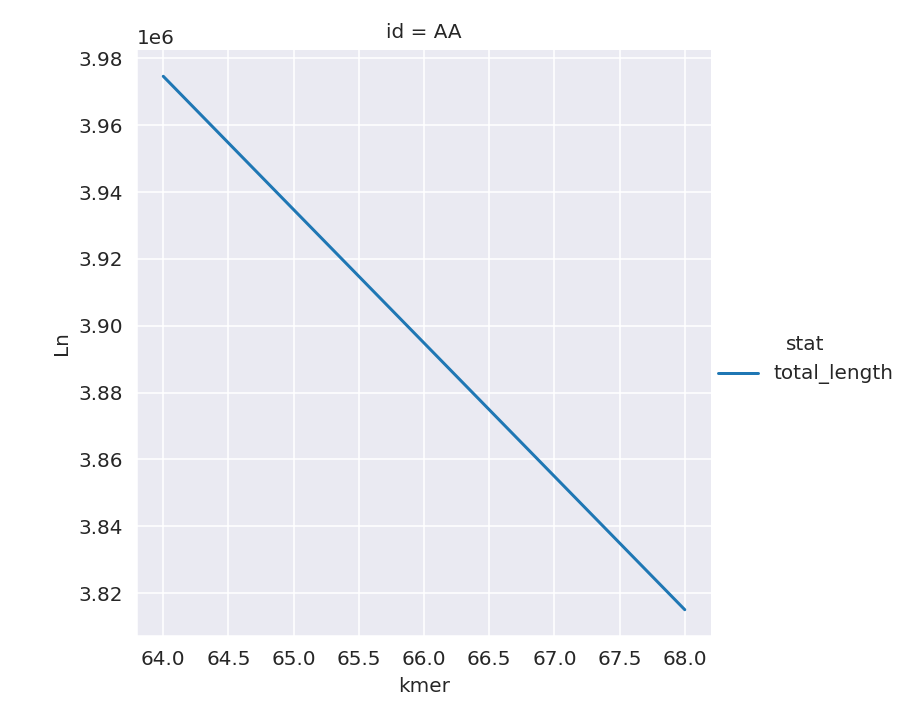
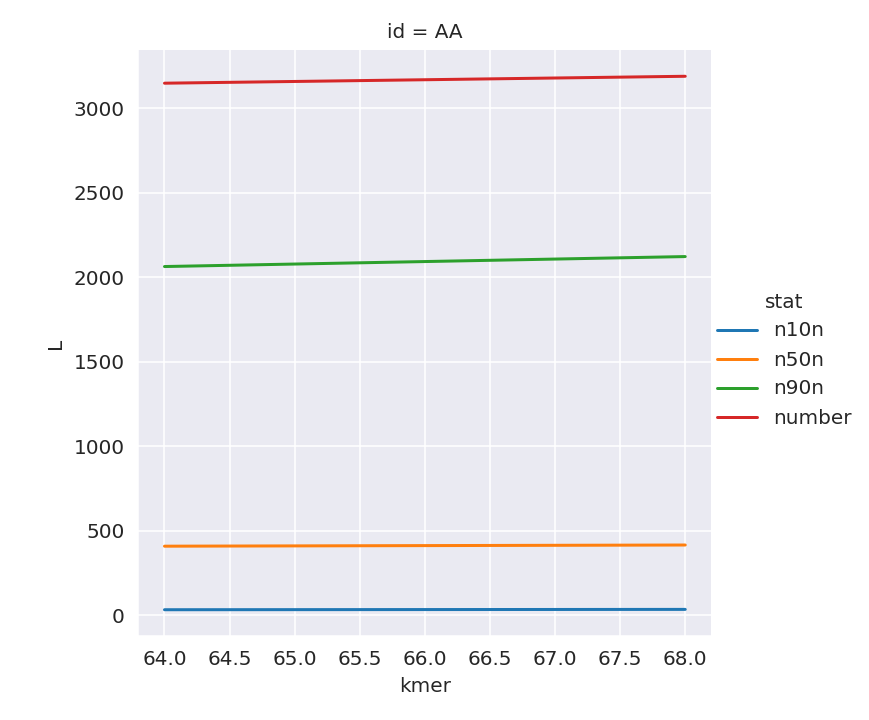
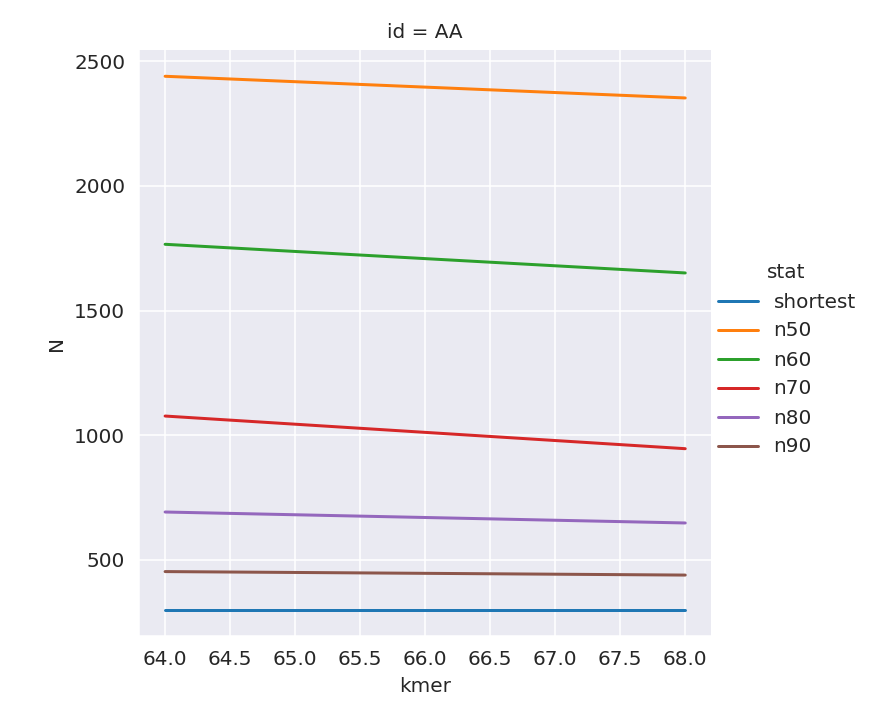

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
#  create stats file
output_assembly_testplots = os.path.join(output_assembly_test,"plots") 
make_dir(output_assembly_testplots)

stat_len, stats_N_hide, stats_N, stats_L_hide, stats_L, stats_gap, stats = def_stats()
create_stats_files(stats, output_assembly_testplots)

for k in range(kmin, kmax, step.value) :
    for id in accession.value :
        fill_stats_files(output_assembly_fasta, id, k, output_assembly_testplots, threshold, logger)
        
dashboard_ab(stat_len,stats_N,stats_L,output_assembly_testplots)

bgc('LightBlue')

#### __Assembly step 2 : assembly with the final k value__

### Running ABySS for each individual


In [14]:
k2 = box_config_abyss2()
bgc('LightBlue')

WidgetBox(background='#E3ECF1')
    [0] Markdown(str)
    [1] Column(width=800)
        [0] IntInput(end=92, name='K-mer length', start=24, value=64)
        [1] Row
            [0] Button(button_type='primary', name='SAVE', width=100)
            [1] Button(button_type='primary', name='INIT', width=100)
        [2] Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], height=200, margin=(0, 0, 25, 0), sizing_mode='stretch_width')

check group -> debug DT

In [15]:
import glob

output_assembly_ctgs = os.path.join(output_assembly_dir,"02-final_abyss") 
make_dir(output_assembly_ctgs)

output_assembly_ffasta = os.path.join(output_assembly_ctgs,"fasta")
make_dir(output_assembly_ffasta)
         
kfinal = int(k2.value) 

#for id in df_group :
for index, row in df_group.iterrows() :

    id = row['sample']
    id_folder =  id + "_k" + str(kfinal)      
         
    if index==2 :
        continue
        
    if id in accession.value :
        
        ln_dir=os.path.join(output_assembly_ctgs,id_folder)
        if not os.path.exists(ln_dir):
            os.symlink(os.path.join(output_assembly_test,id_folder),  os.path.join(ln_dir))
        else:
            at = "warning"
            text = f"""### {at }
<hr>
Symbolic Link of this directory {ln_dir} already existed"""

            display_alert(text,at)
        
        files = glob.iglob(os.path.join(output_assembly_fasta, f"*{id_folder}*.fasta"))
        for file in files:
            #print(file)
            if os.path.isfile(file):
                shutil.copy(file, output_assembly_ffasta)
                os.remove(file)
    else : 
        abyss_pe(project_name.value, id, kfinal, output_filtered_bam, output_assembly_ctgs, logger) 
        filter_fastq_threshold(output_assembly_ctgs + "/" + id_folder + "/" + project_name.value+ "_" + id + "_" + str(kfinal) + "-contigs.fa",
                               output_assembly_ffasta + "/" + id_folder + "_thr" + str(threshold) + "-contigs.fasta", threshold)
        
text = f"""
    ### Assembly with abyss and fixed khmer
    
    <hr>

    * BAM DIR : {output_filtered_bam}
    * ABYSS DIR : {output_assembly_ctgs}
    """

display_alert(text, "success")

bgc('LightBlue')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

In [17]:
stat_file=os.path.join(output_assembly_dir,"02-final_abyss.stats") 
fasta_stats(output_assembly_ffasta, stat_file, logger)

dashboard_assembly(stat_file,df_group)


Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [3] Markdown(str)
    [4] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [5] Markdown(str)
    [6] Row
        [0] Markdown(str)
    [7] Row
        [0] MultiChoice(margin=(0, 20, 0, 0), name='Group', options=['O. barthii', ...])
        [1] MultiChoice(margin=(0, 20, 0, 0), name='Sample', options=['AA', 'AB'])
    [8] ParamFunction(function, max_height=600, width=800)

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 4 - Removing contamination<a class="anchor" id="contamination"></a></span>

#### __VecScreen__

[BDD UniVec_Core](https://ftp.ncbi.nlm.nih.gov/pub/UniVec/UniVec_Core) + makeblastdb -in UniVec_Core -dbtype nucl
VecScreen parameters :
   * -i  Query File
   * -o  Output File
   * -d  Database
   * -f  Output format [3 = Text list, no alignments]
   
sudo apt install ncbi-tools-bin


In [18]:
output_contamination = os.path.join(output_dir,"03-check_contamination")
make_dir(output_contamination)

output_vecscreen = os.path.join(output_contamination,"01-vecscreen")
make_dir(output_vecscreen)

index_blast(vec_file.value,logger)
    
for index, row in df_group.iterrows() :
    id = row['sample']
    run_vecscreen(fasta_dir=output_assembly_ffasta,
                  id=id,
                  k=kfinal,
                  threshold=threshold,
                  output_dir=output_vecscreen,
                  bank=vec_file.value, logger=logger)
bgc('LightBlue')


Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 5 - Reducing Sequence Redundancy<a class="anchor" id="redundancy"></a></span>

frangiPANe uses CD-HIT to cluster sequences and to reduce sequence redundancy (inter and intra-species).


#### __Merge all contigs__


In [21]:
### create clustering directory
output_clustering_dir = os.path.join(output_dir,"04-clustering")
make_dir(output_clustering_dir)

copy_cluster(output_vecscreen,output_clustering_dir)
      
### ADD logger
merged_contigs = os.path.join(output_clustering_dir,project_name.value+"_allContigs.fasta")  
merging_cluster(output_clustering_dir,merged_contigs)

### stat
final_stat_file=os.path.join(output_clustering_dir,project_name.value+"_allContigs.stats") 
fasta_stats(output_clustering_dir, final_stat_file, logger)

dashboard_ass(final_stat_file,df_group)

bgc('LightBlue')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Markdown(str)

#### __Clustering contigs__

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Markdown(str)
        [1] Markdown(str)
    [3] Matplotlib(Figure)
    [4] Matplotlib(Figure)
    [5] Matplotlib(Figure)
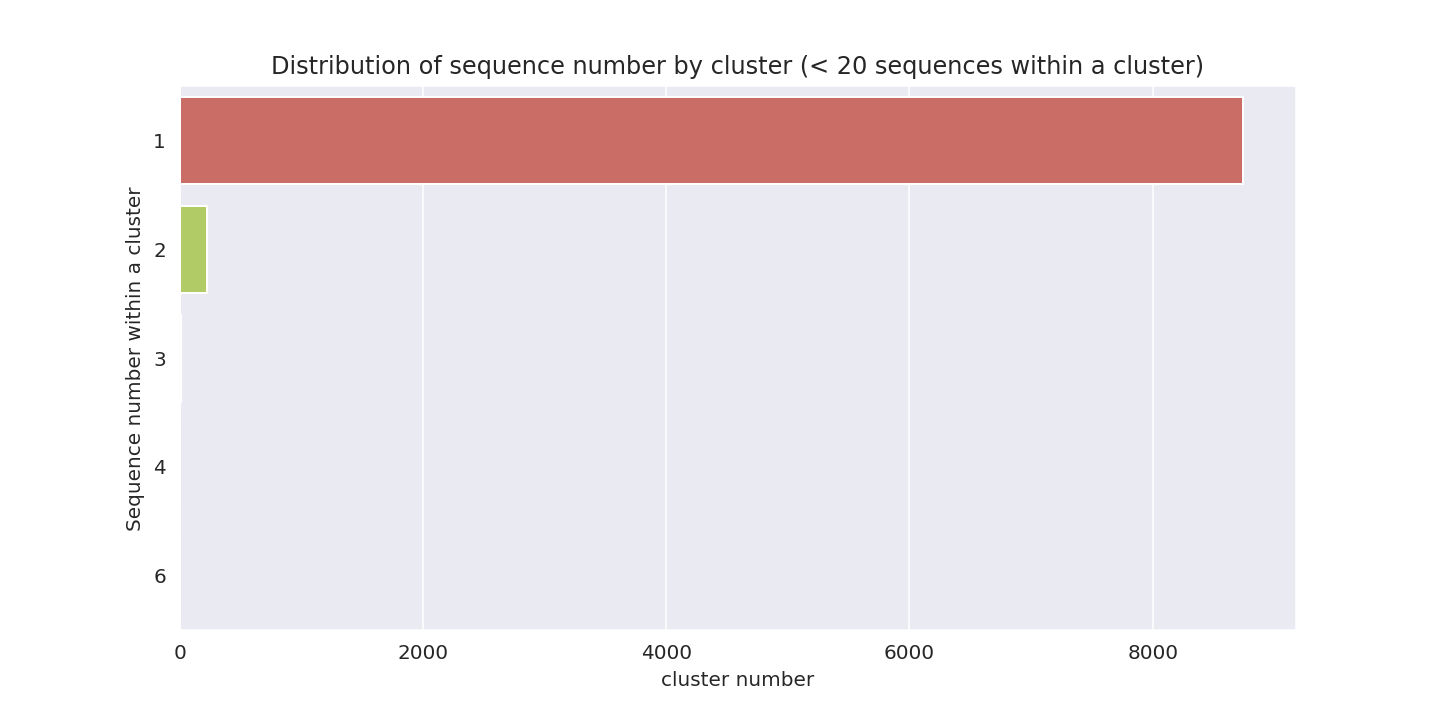
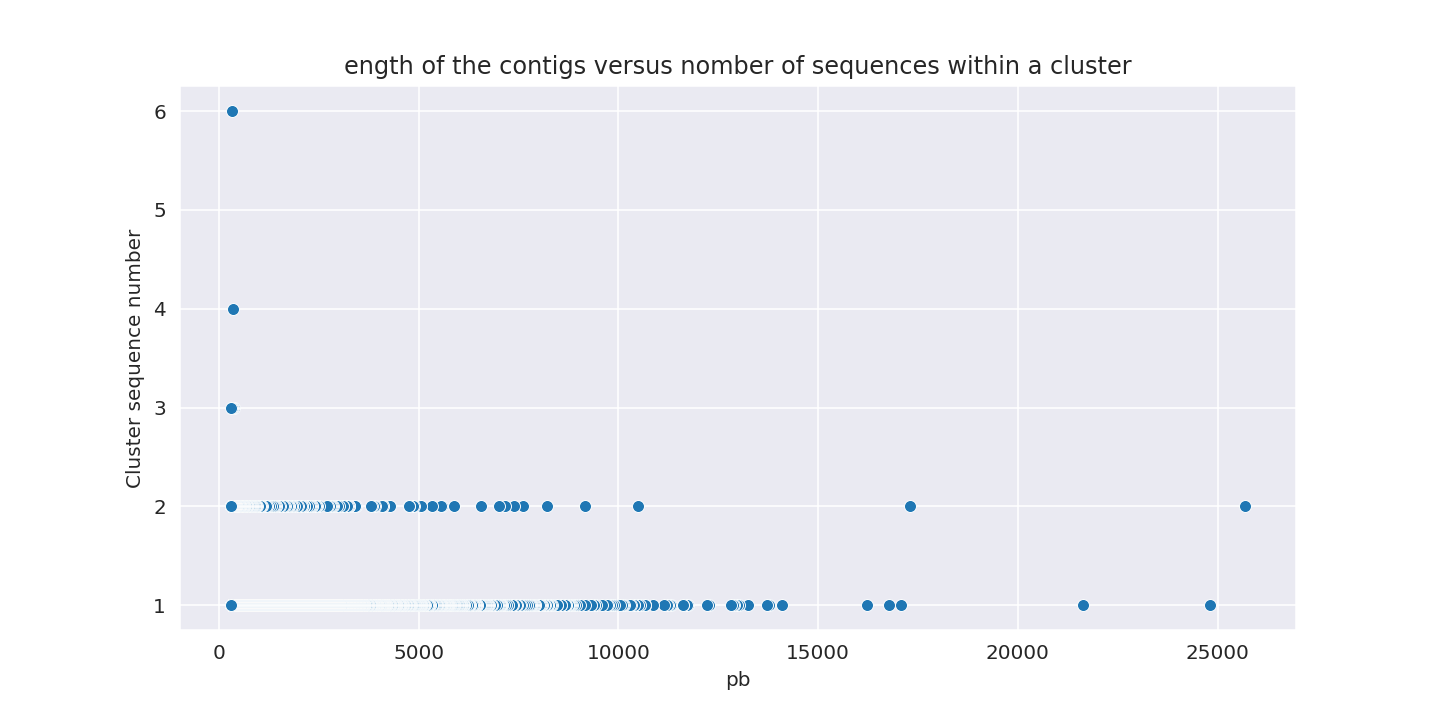
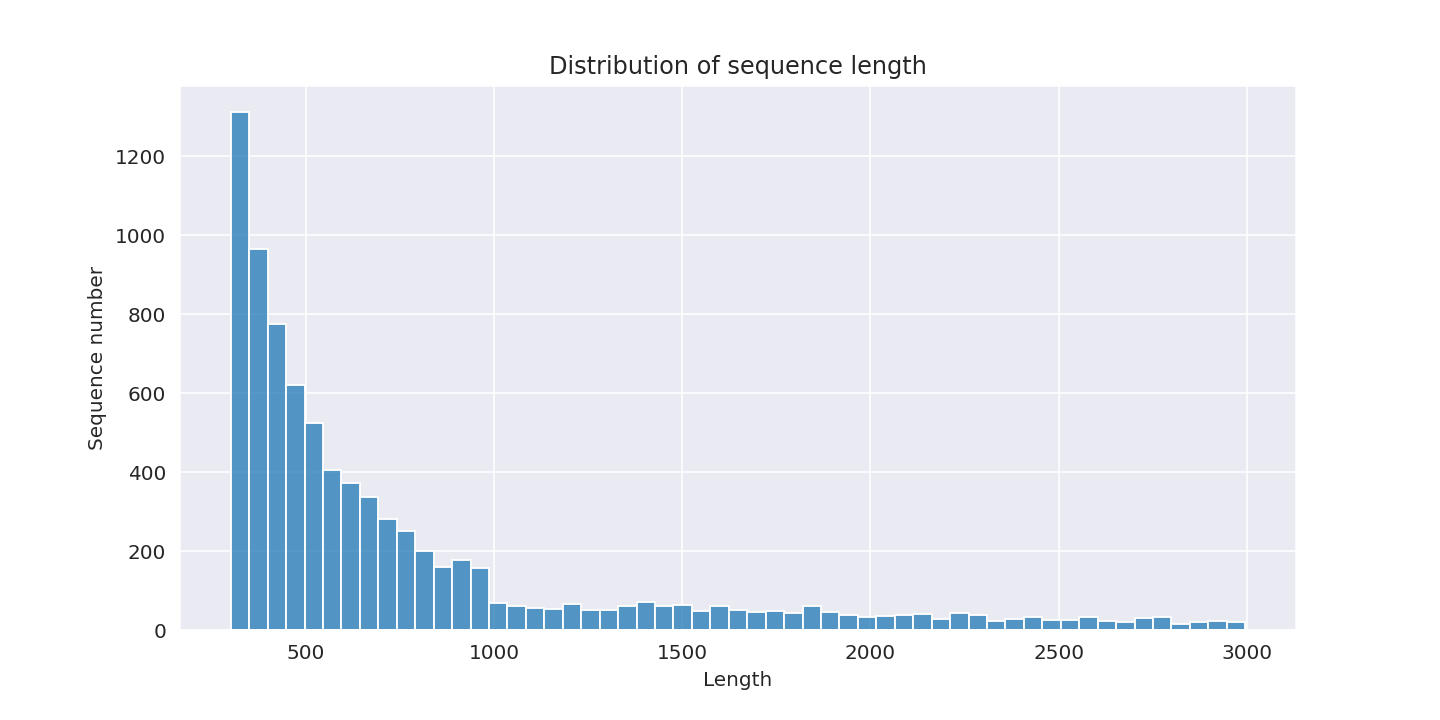

In [22]:
cdhit_id=0.8
cdhit_length=0.95

# Run clustering
cdhit_fasta = os.path.join(output_clustering_dir,project_name.value+"_clusters.cdhit")  
cdhit(merged_contigs,cdhit_id,cdhit_length, cdhit_fasta, logger)

# Analysing
cdhit_cluster = cdhit_fasta + ".clstr"
cdhit_csv = cdhit_fasta + ".csv"
df_cdhit=parse_cdhit(cdhit_cluster, df_group, cdhit_csv)

#Dashboard
dashboard_cdhit(df_cdhit)

bgc('LightBlue')

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 6 - Anchoring Clusters on Reference Genome<a class="anchor" id="anchoring"></a></span>

#### __Generating panreference__

---


In [23]:
### create  directory
output_panref_dir = output_dir + "/05-panreference/"
make_dir(output_panref_dir)

panref_fasta = output_panref_dir + project_name.value+"_panref.fasta"
filenames = [ref_file.value, cdhit_fasta]

with open(panref_fasta, 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

display_alert(f"Panreference file successfully created : {panref_fasta}", "success")

index_reference_genome(panref_fasta, logger)
#total_genome_size=dashboard_genome(panref_fasta)

bgc('LightBlue')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Mapping against panreference__


Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='danger', css_classes=['alert', 'alert-danger'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='danger', css_classes=['alert', 'alert-danger'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='danger', css_classes=['alert', 'alert-danger'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='danger', css_classes=['alert', 'alert-danger'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [4] Markdown(str)
    [5] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [6] Markdown(str)
    [7] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [8] Matplotlib(Figure)
    [9] Row
        [0] MultiChoice(margin=(0, 20, 0, 0), name='Group', options=['O. barthii', ...])
        [1] MultiChoice(margin=(0, 20, 0, 0), name='Sample', options=['AA', 'AA', 'AB', 'AB'])
    [10] ParamFunction(function, max_height=400, width=400)
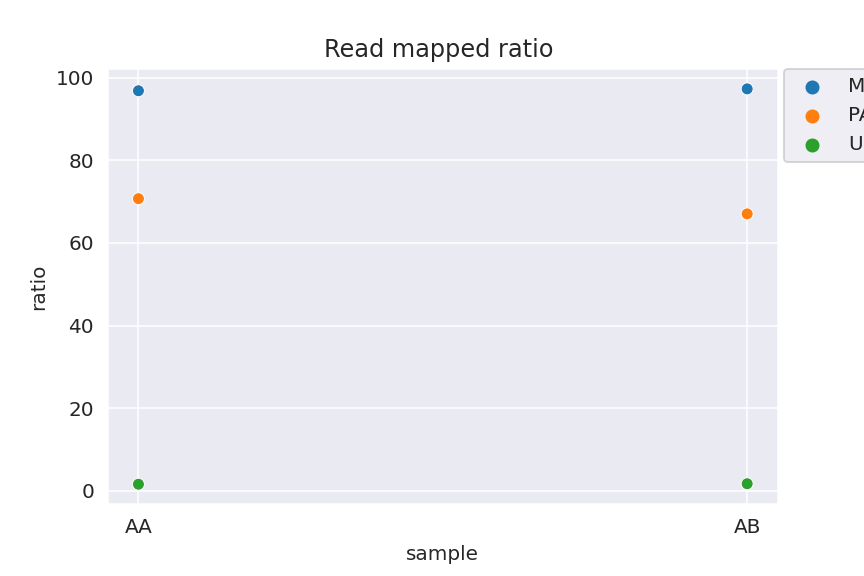

In [40]:
output_panrefmapping_dir = output_panref_dir + "/mapping/"
fastq2bam_dir(panref_fasta, fastq_dir.value, df_group, cpu, output_panrefmapping_dir, logger)

stat2_dir = output_panref_dir + "/mapping_stat/"
make_dir(stat2_dir)

logger.info(f"MAPPING STAT :")
logger.info(f"\t\tMapping stat directory : {stat_dir}")

for file_name in os.listdir(output_panrefmapping_dir):
    if ".bam" in file_name:
        samtools_index(os.path.join(output_panrefmapping_dir,file_name),logger)
        samtools_flagstat(os.path.join(output_panrefmapping_dir,file_name),stat2_dir,logger)

#### Compiling stats into a unique tabulated file
merge_flagstat(output_dir=stat2_dir, logger=logger)

### Dashboard
stat2_file = os.path.join(stat2_dir,"all_flagstat.csv")
dashboard_flagstat(stat2_file,df_group)

bgc('LightBlue')

#### __Anchoring contigs on reference genome__

#### __Panreference dashboard__

In [41]:
panrefposi_dir = output_panref_dir + "/placement/"
make_dir(panrefposi_dir)

panrefposi_file = panrefposi_dir + "ctgs_on_ref.csv"

#logger.info(f"MAPPING STAT :")
#logger.info(f"\t\tMapping stat directory : {stat_dir}")

for file_name in os.listdir(output_panrefmapping_dir):
    if ".bam" in file_name and not ".bai" in file_name and not os.path.exists(os.path.join(output_panrefmapping_dir,file_name)):
        samtools_index(os.path.join(output_panrefmapping_dir,file_name),logger)

text=f"Anchoring indexing..."
display_alert(text, "secondary")

cmd = f'tools/parseBamv7.py -b {output_panrefmapping_dir} -d 15 -o {panrefposi_file}'
process = subprocess.run(cmd, shell=True, capture_output=True, text=True)
logger.info(f"\t\t\placement cmd : {cmd}")

if process.returncode:
    text = f"Failed execution.... see log file, resolve the problem and try again"
    at = 'danger'
else:
    at = 'success'
    text = f"script executed successfully"
logger.info(f"\t\t\tLog : {process.stdout + process.stderr}")
display_alert(text, at)

bgc('LightBlue')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

In [80]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

# To manage missing data before using this jupyter book
# sed 's/None/-9999/g' out10depth247bam.csv > out10depth247bamNan.csv 
# sed 's/\s//g' out10depth247bamNan.csv > out10depth247bamNan2.csv

# Load csv file generated by script to place the contig on the reference
panrefposi_file2 = panrefposi_dir + "ctgs_on_refNan2.csv"
df_anc = pd.read_csv(panrefposi_file2, index_col=False, sep=";") #na_values="None")

# Contigs number total
nb_tot_ctgs = 8972

#get the name of columns
print([*df_anc])

#df_anc.dtypes

# Columns To print
col_toprint = ['CTG_name',
 'CTG_len',
 'CHR_name',
 'ANCHORING_TAG',
 'SAMPLE',
 'SAMPLE_list',
 'TOT_Hit',
 'START_Hit',
 'START_CHR_posi_sd',
 'START_CHR_Min',
 'END_Hit',
 'END_CHR_posi_sd',
 'END_CHR_Max',
 'Chr_Ln']


['CTG_name', 'CTG_len', 'CHR_name', 'ANCHORING_TAG', 'SAMPLE', 'SAMPLE_list', 'TOT_Hit', 'qual', 'START_Hit', 'START_CTG_Posi', 'START_CTG_posi_sd', 'START_CHR_Posi', 'START_CHR_posi_sd', 'START_CHR_Min', 'END_Hit', 'END_CTG_Posi', 'END_CTG_posi_sd', 'END_CHR_Posi', 'END_CHR_posi_sd', 'END_CHR_Max', 'Chr_Ln', 'CHR_all_posi_sd', 'CHR_all_posi', 'ALL_POSI_LIST']


In [81]:
print(df_anc.head())

   CTG_name  CTG_len CHR_name ANCHORING_TAG  SAMPLE  SAMPLE_list  TOT_Hit  \
0  AA_15687      785    Chr01            5'       2  ['AA','AB']       70   
1    AB_509      533    Chr04            5'       2  ['AA','AB']      139   
2    AB_509      533    Chr05            5'       2  ['AA','AB']       16   
3    AB_509      533    Chr06            5'       2  ['AA','AB']       33   
4    AB_509      533    Chr07            5'       2  ['AA','AB']       25   

                                                qual  START_Hit  \
0  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1...         43   
1  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1...        117   
2                    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]         15   
3  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1...         30   
4  [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]         22   

                                      START_CTG_Posi  ...  END_Hit  \
0  [52,271,85,112,157,85,183,275,166,110,44,104,1...  ...       

In [82]:
######################### STATS ON RAW DATA (CTGS anchored with a minimal depth of 10)
bothCtg = len(df_anc[df_anc.ANCHORING_TAG=="5\'&3\'"])

startCtg = len(df_anc[df_anc.ANCHORING_TAG=="5\'"])
endCtg = len(df_anc[df_anc.ANCHORING_TAG=="3\'"])
oneCtg = startCtg + endCtg
perc = startCtg / oneCtg * 100

allCtg = oneCtg + bothCtg

print("WITH REDONDANT ANCHORING : ", allCtg)
print("5 & 3: ", bothCtg)
print("Just 5 or 3: ", oneCtg)
print("---> 5: ", startCtg, perc )
print("---> 3: ", endCtg)

WITH REDONDANT ANCHORING :  3691
5 & 3:  450
Just 5 or 3:  3241
---> 5:  2495 76.9824128355446
---> 3:  746


In [83]:
######################### STATS ON CTGS PLACED JUST ON A SINGLE CHR
### ALL CTGS PLACED (with redondant ctgs)
unique = df_anc.CTG_name.nunique(dropna = True)
print("ALL CTGS NON REDONDANTS(sans duplicat, ctg dupliqué une fois) : ",unique, ",", round(unique/nb_tot_ctgs*100,2),"% of all ctgs" )

### JUST ATGS PLACE ON A SINGLE CHR
# remove toutes les rows avec plusieurs fois le meme contigs
df_oneanc = df_anc.drop_duplicates('CTG_name', keep=False)

# STATS ON CTGS PLACED JUST ONCE ON A SINGLE CHROMOSOME
startCtg = len(df_oneanc[df_oneanc.ANCHORING_TAG=="5\'"])
endCtg = len(df_oneanc[df_oneanc.ANCHORING_TAG=="3\'"])
oneCtg = startCtg + endCtg
perc = startCtg / oneCtg * 100

bothCtg = len(df_oneanc[df_oneanc.ANCHORING_TAG=="5\'&3\'"])

allCtg = oneCtg + bothCtg

print("\nSANS CTGS REDONDANTS : ", allCtg, ",", round(allCtg/nb_tot_ctgs*100,2),"% of all ctgs" )
print("STAT tot, mean then median ctg length :",len(df_oneanc),round(df_oneanc["CTG_len"].mean(),2),round(df_oneanc["CTG_len"].median(),2))
print("5 & 3: ", bothCtg)
print("Just 5 or 3: ", oneCtg)
print("---> 5: ", startCtg)
print("---> 3: ", endCtg)

print("\nNb contigs duplicats :", unique-allCtg)

ALL CTGS NON REDONDANTS(sans duplicat, ctg dupliqué une fois) :  3258 , 36.31 % of all ctgs

SANS CTGS REDONDANTS :  3033 , 33.81 % of all ctgs
STAT tot, mean then median ctg length : 3033 1145.44 596.0
5 & 3:  375
Just 5 or 3:  2658
---> 5:  2055
---> 3:  603

Nb contigs duplicats : 225


In [84]:
#both_bool = (df_oneanc.ANCHORING_TAG=="5\'&3\'")
#print(df_oneanc[both_bool].START_CHR_posi_sd)
print(df_oneanc)

      CTG_name  CTG_len CHR_name ANCHORING_TAG  SAMPLE  SAMPLE_list  TOT_Hit  \
0     AA_15687      785    Chr01            5'       2  ['AA','AB']       70   
6     AA_17299     4157    Chr10            3'       1       ['AA']       48   
7     AA_17148     2612    Chr04            3'       2  ['AA','AB']       46   
33     AA_9739     1396    Chr04         5'&3'       1       ['AA']       34   
34    AA_12056     1636    Chr02            3'       2  ['AA','AB']      207   
...        ...      ...      ...           ...     ...          ...      ...   
3686  AB_14284      429    Chr12            5'       1       ['AB']       59   
3687  AB_21092      318    Chr12            5'       1       ['AB']       35   
3688  AB_25860      317    Chr12            5'       1       ['AB']       25   
3689  AB_23655      439    Chr02            5'       1       ['AB']       24   
3690  AB_35598     4653    Chr02            5'       1       ['AB']       30   

                                       

In [85]:
#### ADD CHR SD AS COLUMN
df_oneanc['START_CHR_sd']=df_oneanc.START_CHR_posi_sd.str.extract('(.+)\(.*').fillna(0).astype(float)
df_oneanc['END_CHR_sd']=df_oneanc.END_CHR_posi_sd.str.extract('(.+)\(.*').fillna(0).astype(float)
                                                                      
####  CTGS PLACED UNIQUELY ON ONE CHR
both_bool = (df_oneanc.ANCHORING_TAG=="5\'&3\'")
nan_bool1 =  (df_oneanc.START_CHR_sd == -9999.0)
nan_bool2 =  (df_oneanc.END_CHR_sd == -9999.0)

print(df_oneanc[both_bool].START_CHR_sd.sort_values())


1764      -9999.0
2636          4.0
515          12.0
706          16.0
2984         17.0
          ...    
1017     293781.0
2584    1644959.0
2569    2102274.0
1934    5153918.0
1187    5183997.0
Name: START_CHR_sd, Length: 375, dtype: float64


/tmp/ipykernel_12966/182197558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oneanc['START_CHR_sd']=df_oneanc.START_CHR_posi_sd.str.extract('(.+)\(.*').fillna(0).astype(float)
/tmp/ipykernel_12966/182197558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oneanc['END_CHR_sd']=df_oneanc.END_CHR_posi_sd.str.extract('(.+)\(.*').fillna(0).astype(float)


In [86]:

#print(df_oneanc[both_bool  & (nan_bool2) & (df_oneanc.END_CHR_sd <1000)][['CTG_name','END_CHR_sd']].sort_values(by='END_CHR_sd'))
#print(df_oneanc[both_bool & (nan_bool1)].START_CHR_sd.sort_values())

## Ctgs number
print("ALL CTGS BOTH END :", df_oneanc[both_bool].CTG_name.count())     
print("\n---> 5' anchoring")
print("min - max START CTG sd (median): ", df_oneanc[both_bool].START_CTG_posi_sd.min(), df_oneanc[both_bool].START_CTG_posi_sd.max(), "(", df_oneanc[both_bool].START_CTG_posi_sd.median(),")")
print("min - max START CHR sd (median): ",df_oneanc[both_bool & ~(nan_bool1)].START_CHR_sd.min(), df_oneanc[both_bool & ~(nan_bool1)].START_CHR_sd.max(), "(", df_oneanc[both_bool  & ~(nan_bool1)].START_CHR_sd.median(), ")")

print("\n---> 3' anchoring")
print("min - max END CTG sd (median): ", df_oneanc[(df_oneanc.ANCHORING_TAG=="5\'&3\'")].END_CTG_posi_sd.min(), df_oneanc[(df_oneanc.ANCHORING_TAG=="5\'&3\'")].END_CTG_posi_sd.max(), "(",df_oneanc[both_bool].END_CTG_posi_sd.median(),")")
print("min - max END CHR sd (median): ",df_oneanc[both_bool  & ~(nan_bool2)].END_CHR_sd.min(), df_oneanc[both_bool].END_CHR_sd.max(),"(",df_oneanc[both_bool ].END_CHR_sd.median(),")")

print("\nFILTERING")
#print("START and END CHR sd >2000 :", df_oneanc[both_bool & ((df_oneanc.START_CHR_sd >2000) & (df_oneanc.END_CHR_sd>2000))].CTG_name.count())
print("---> REMOVE ---- START and END CHR sd >1000 :", df_oneanc[both_bool & ((df_oneanc.START_CHR_sd >1000) & (df_oneanc.END_CHR_sd>1000))].CTG_name.count())
print("---> KEEP ---- START or END CHR sd <1000 nan:", df_oneanc[(both_bool) & ((df_oneanc.START_CHR_sd <1000 & ~nan_bool1) | ((df_oneanc.END_CHR_sd<1000) &  ~nan_bool2))].CTG_name.count())

# Print df into csv for ctgs anchored bot side with sd < 1000
df_oneanc[(both_bool) & ((df_oneanc.START_CHR_sd <1000 & ~nan_bool1) | ((df_oneanc.END_CHR_sd<1000) &  ~nan_bool2))][col_toprint].to_csv('OUT-ANCH-Both-end-sd1000-nan.csv', index=False)


ALL CTGS BOTH END : 375

---> 5' anchoring
min - max START CTG sd (median):  18 113 ( 82.0 )
min - max START CHR sd (median):  4.0 5183997.0 ( 117.0 )

---> 3' anchoring
min - max END CTG sd (median):  11 86 ( 58.0 )
min - max END CHR sd (median):  3.0 9587843.0 ( 111.0 )

FILTERING
---> REMOVE ---- START and END CHR sd >1000 : 7
---> KEEP ---- START or END CHR sd <1000 nan: 347


In [87]:
####  CTGS PLACED UNIQUELY ON ONE CHR BY JUST ONE END
one5_bool = (df_oneanc.ANCHORING_TAG=="5\'")
one3_bool = (df_oneanc.ANCHORING_TAG=="3\'")
             
## Ctgs number
print("ALL CTGS one end:", df_oneanc[~both_bool].CTG_name.count())
print("\n---> ALL CTGS 5':", df_oneanc[one5_bool].CTG_name.count())     
print("- anchoring")
print("min - max START CTG sd (median): ", df_oneanc[one5_bool].START_CTG_posi_sd.min(), df_oneanc[one5_bool].START_CTG_posi_sd.max(), "(", df_oneanc[one5_bool].START_CTG_posi_sd.median(),")")
print("min - max START CHR sd (median): ",df_oneanc[one5_bool & ~(nan_bool1)].START_CHR_sd.min(), df_oneanc[one5_bool].START_CHR_sd.max(),"(", df_oneanc[one5_bool].START_CHR_sd.median(),")")

print("\n--->  ALL CTGS 3':", df_oneanc[one3_bool].CTG_name.count()) 
print("- anchoring")
print("min - max END CTG sd (median): ", df_oneanc[one3_bool].END_CTG_posi_sd.min(), df_oneanc[one3_bool].END_CTG_posi_sd.max(), "(", df_oneanc[one3_bool].END_CTG_posi_sd.median(),")")
print("min - max END CHR sd (median): ",df_oneanc[one3_bool & ~(nan_bool2)].END_CHR_sd.min(), df_oneanc[one3_bool].END_CHR_sd.max(),"(", df_oneanc[one3_bool].END_CHR_sd.median(),")")

print("\nFILTERING")
print("---> REMOVE ---- START CHR sd >1000 :", df_oneanc[one5_bool & (df_oneanc.START_CHR_sd >1000)].CTG_name.count())
print("---> KEEP ---- START CHR sd <1000 :", df_oneanc[one5_bool &  ~(nan_bool1) & (df_oneanc.START_CHR_sd <1000)].CTG_name.count())
    

print("\nFILTERING")
print("---> REMOVE ---- END CHR sd >1000 :", df_oneanc[one3_bool & (df_oneanc.END_CHR_sd>1000)].CTG_name.count())
print("---> KEEP ---- END CHR sd <1000 :", df_oneanc[one3_bool & ~(nan_bool2) & (df_oneanc.END_CHR_sd<1000)].CTG_name.count())

print("\nKEEPING")
print("CHR sd <1000 nan:", df_oneanc[one3_bool & ~(nan_bool2) & (df_oneanc.END_CHR_sd<1000)].CTG_name.count()+ df_oneanc[one5_bool &  ~(nan_bool1) & (df_oneanc.START_CHR_sd <1000)].CTG_name.count())

# Print df into csv for ctgs anchored one side with sd < 1000
pd.concat([df_oneanc[one3_bool & ~(nan_bool2) & (df_oneanc.END_CHR_sd<1000)][col_toprint], df_oneanc[one5_bool &  ~(nan_bool1) & (df_oneanc.START_CHR_sd <1000)][col_toprint]]).to_csv('OUT-ANCH-one-end-sd1000.csv', index=False)


ALL CTGS one end: 2658

---> ALL CTGS 5': 2055
- anchoring
min - max START CTG sd (median):  5 120 ( 78.0 )
min - max START CHR sd (median):  0.0 13109731.0 ( 119.0 )

--->  ALL CTGS 3': 603
- anchoring
min - max END CTG sd (median):  2 90 ( 59.0 )
min - max END CHR sd (median):  0.0 13507492.0 ( 106.0 )

FILTERING
---> REMOVE ---- START CHR sd >1000 : 267
---> KEEP ---- START CHR sd <1000 : 1788

FILTERING
---> REMOVE ---- END CHR sd >1000 : 42
---> KEEP ---- END CHR sd <1000 : 561

KEEPING
CHR sd <1000 nan: 2349


In [88]:
oneSide = df_oneanc[one3_bool & ~(nan_bool2) & (df_oneanc.END_CHR_sd<1000)].CTG_name.count()
otherSide = df_oneanc[one5_bool &  ~(nan_bool1) & (df_oneanc.START_CHR_sd <1000)].CTG_name.count()
print(oneSide, otherSide, oneSide+otherSide)

bothSide =  df_oneanc[(both_bool) & ((df_oneanc.START_CHR_sd <1000 & ~nan_bool1) | ((df_oneanc.END_CHR_sd<1000) &  ~nan_bool2))].CTG_name.count()
print(bothSide, bothSide+oneSide+otherSide)

561 1788 2349
347 2696


In [89]:

df_thebest = pd.concat([df_oneanc[one3_bool & ~(nan_bool2) & (df_oneanc.END_CHR_sd<1000)][col_toprint], df_oneanc[one5_bool &  ~(nan_bool1) & (df_oneanc.START_CHR_sd <1000)][col_toprint], df_oneanc[(both_bool) & ((df_oneanc.START_CHR_sd <1000 & ~nan_bool1) | ((df_oneanc.END_CHR_sd<1000) &  ~nan_bool2))][col_toprint]])
print(df_thebest.CTG_name.count())

print(df_thebest.CTG_len.min(), df_thebest.CTG_len.max(),  round(df_thebest.CTG_len.mean(),2),df_thebest.CTG_len.median() )
print(df_thebest.SAMPLE.min(),df_thebest.SAMPLE.max(), round(df_thebest.SAMPLE.mean(),2), df_thebest.SAMPLE.median() )

#duplicat + unique removing by filters
ctg_list = df_thebest.CTG_name
df_thebad = df_anc[~(df_anc.CTG_name.isin(ctg_list))][col_toprint]

print(df_thebad.CTG_len.max(), df_thebad.CTG_len.min(), round(df_thebad.CTG_len.mean(),2))
print(df_thebad.SAMPLE.max(), df_thebad.SAMPLE.min(), round(df_thebad.SAMPLE.mean(),2))

df_thebest.to_csv('OUT-THEBEST-sd1000.csv', index=False)
df_thebad.to_csv('OUT-THEBAD-sd1000.csv', index=False)

#print(df_thebad)

2696
300 25694 1187.68 620.0
1 2 1.31 1.0
10485 300 987.4
2 1 1.63


In [90]:
print(df_thebest.CHR_name)

6       Chr10
7       Chr04
34      Chr02
48      Chr11
79      Chr03
        ...  
3668    Chr12
3672    Chr12
3674    Chr12
3679    Chr12
3682    Chr12
Name: CHR_name, Length: 2696, dtype: object


2696
Chr11    395
Chr12    368
Chr04    280
Chr01    256
Chr07    251
Chr02    225
Chr06    214
Chr10    171
Chr09    142
Chr03    142
Chr05    137
Chr08    115
Name: CHR_name, dtype: int64


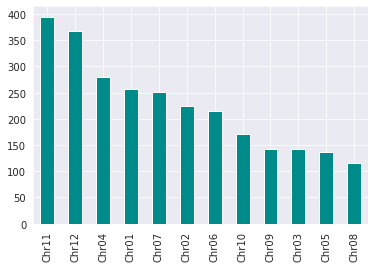

In [91]:
df_thebest.CHR_name.value_counts().plot(kind='bar', color='darkcyan')
print(df_thebest.CHR_name.value_counts().sum())
print(df_thebest.CHR_name.value_counts())


In [105]:
headers = ["chrName","pos", "CTG_name"]

df_plot = df_thebest[df_oneanc.ANCHORING_TAG=="5\'&3\'"]
karyoBoth = [df_plot.CHR_name, df_plot.START_CHR_Min, df_plot.CTG_name]
df_karyo = pd.concat(karyoBoth, axis=1, keys=headers)

df2_plot = df_thebest[df_oneanc.ANCHORING_TAG=="5\'"]
karyoBoth2 = [df2_plot.CHR_name, df2_plot.START_CHR_Min, df2_plot.CTG_name]
df2_karyo = pd.concat(karyoBoth2, axis=1, keys=headers)

df3_plot = df_thebest[df_oneanc.ANCHORING_TAG=="3\'"]
karyoBoth3 = [df3_plot.CHR_name, df3_plot.END_CHR_Max, df3_plot.CTG_name]
df3_karyo = pd.concat(karyoBoth3, axis=1,keys=headers)

frames = [df_karyo, df2_karyo, df3_karyo]
result = pd.concat(frames)
print(result)

     chrName           pos  CTG_name
33     Chr04  1.304048e+06   AA_9739
82     Chr03  1.373094e+07  AB_34501
132    Chr10  2.632004e+06  AA_14296
208    Chr01  1.058965e+07  AA_11928
256    Chr09  4.077162e+06  AA_16841
...      ...           ...       ...
3646   Chr12  7.536164e+06  AB_10794
3656   Chr12  1.425206e+07  AB_33287
3659   Chr12  1.527271e+07  AB_30049
3661   Chr12  1.683182e+07   AB_6225
3663   Chr12  1.880004e+07   AB_6467

[2696 rows x 3 columns]


/tmp/ipykernel_12966/3177773935.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_thebest[df_oneanc.ANCHORING_TAG=="5\'&3\'"]
/tmp/ipykernel_12966/3177773935.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_plot = df_thebest[df_oneanc.ANCHORING_TAG=="5\'"]
/tmp/ipykernel_12966/3177773935.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3_plot = df_thebest[df_oneanc.ANCHORING_TAG=="3\'"]


In [106]:
result['start']=result['pos'].astype(int)
result['stop']=result['start']+1000

result.drop('pos',1,inplace=True)
result.head()
result.to_csv(r'OUT-THEBEST-sd1000.bed',sep='\t', index = False)

In [119]:
result

,chrName,CTG_name,start,stop
33,Chr04,AA_9739,1304047,1305047
82,Chr03,AB_34501,13730943,13731943
132,Chr10,AA_14296,2632003,2633003
208,Chr01,AA_11928,10589648,10590648
256,Chr09,AA_16841,4077162,4078162
...,...,...,...,...
3646,Chr12,AB_10794,7536164,7537164
3656,Chr12,AB_33287,14252056,14253056
3659,Chr12,AB_30049,15272708,15273708
3661,Chr12,AB_6225,16831815,16832815


      chrom  CTG_name     start       end
0     Chr03  AB_34501  13730943  13731943
1     Chr10  AA_14296   2632003   2633003
2     Chr01  AA_11928  10589648  10590648
3     Chr09  AA_16841   4077162   4078162
4     Chr02  AB_30382   6725168   6726168
...     ...       ...       ...       ...
2690  Chr12  AB_10794   7536164   7537164
2691  Chr12  AB_33287  14252056  14253056
2692  Chr12  AB_30049  15272708  15273708
2693  Chr12   AB_6225  16831815  16832815
2694  Chr12   AB_6467  18800037  18801037

[2695 rows x 4 columns]
adding ideograms...
adding genes...


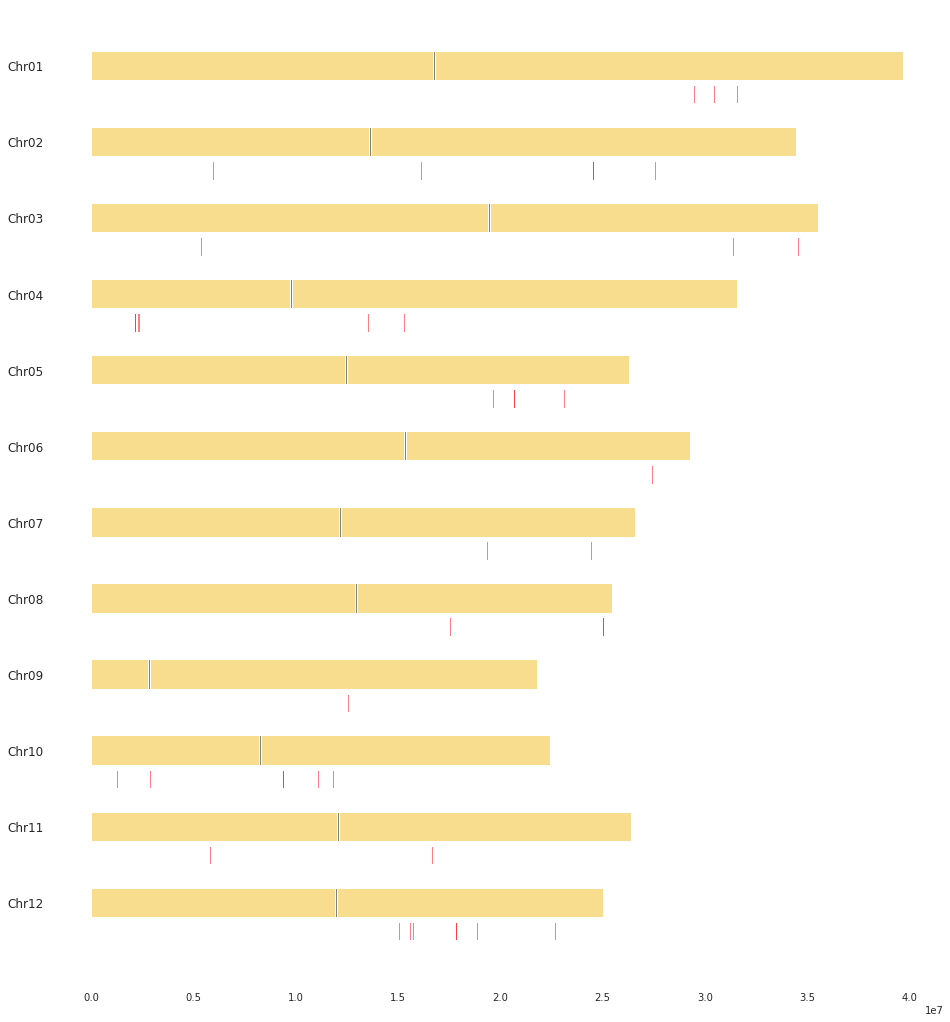

In [122]:
# Plot des locus 

#https://www.biostars.org/p/9922/
#https://www.biostars.org/p/147364/#147637

"""
Demonstrates plotting chromosome ideograms and genes (or any features, really)
using matplotlib.
1) Assumes a file from UCSC's Table Browser from the "cytoBandIdeo" table,
saved as "ideogram.txt". Lines look like this::
    #chrom  chromStart  chromEnd  name    gieStain
    chr1    0           2300000   p36.33  gneg
    chr1    2300000     5300000   p36.32  gpos25
    chr1    5300000     7100000   p36.31  gneg
2) Assumes another file, "ucsc_genes.txt", which is a BED format file
   downloaded from UCSC's Table Browser. This script will work with any
   BED-format file.
"""

from matplotlib import pyplot as plt
from matplotlib.collections import BrokenBarHCollection
import pandas


# Here's the function that we'll call for each dataframe (once for chromosome
# ideograms, once for genes).  The rest of this script will be prepping data
# for input to this function
#
def chromosome_collections(df, y_positions, height,  **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    del_width = False
    if 'width' not in df.columns:
        del_width = True
        df['width'] = df['end'] - df['start']
    for chrom, group in df.groupby('chrom'):
        #print(chrom)
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'width']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors'], **kwargs)
    if del_width:
        del df['width']


# Height of each ideogram
chrom_height = 0.5 #1

# Spacing between consecutive ideograms
chrom_spacing = 0.8

# Height of the gene track. Should be smaller than `chrom_spacing` in order to
# fit correctly
gene_height = 0.3

# Padding between the top of a gene track and its corresponding ideogram
gene_padding = 0.1

# Width, height (in inches)
figsize = (16, 18)

# Decide which chromosomes to use
chromosome_list = ['Chr0%s' % i for i in range(1,10) ]  #+ ['M', 'X', 'Y']]
chromosome_list.append('Chr10')
chromosome_list.append('Chr11')
chromosome_list.append('Chr12')

#print(chromosome_list)
# Keep track of the y positions for ideograms and genes for each chromosome,
# and the center of each ideogram (which is where we'll put the ytick labels)
ybase = 0
chrom_ybase = {}
gene_ybase = {}
chrom_centers = {}

# Iterate in reverse so that items in the beginning of `chromosome_list` will
# appear at the top of the plot
for chrom in chromosome_list[::-1]:
    #print(chrom)
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.
    gene_ybase[chrom] = ybase - gene_height - gene_padding
    ybase += chrom_height + chrom_spacing

#print(ybase)

# Read in ideogram.txt, downloaded from UCSC Table Browser
ideo = pandas.read_table(
    '/home/christine/Documents/These/Data/CDHIT/ALL_CTGS_MERGE/ideogram.txt',
    skiprows=1,
    names=['chrom', 'start', 'end', 'name', 'gieStain']
)

# Filter out chromosomes not in our list
ideo = ideo[ideo.chrom.apply(lambda x: x in chromosome_list)]

# Add a new column for width
ideo['width'] = ideo.end - ideo.start

# Colors for different chromosome stains
color_lookup = {
    'gneg': (1., 1., 1.),
    'gpos25': (.6, .6, .6),
    'gpos50': (.4, .4, .4),
    'gpos75': (.2, .2, .2),
    'gpos100': (0., 0., 0.),
    'acen': 'grey',#"steelblue", #(.8, .4, .4),
    'gvar': '#f7dd8d',#"steelblue", #(.8, .8, .8),
    'stalk': '#f7dd8d',#"lightblue", #(.9, .9, .9),
}

# Add a new column for colors
ideo['colors'] = ideo['gieStain'].apply(lambda x: color_lookup[x])

#print(ideo)
# Same thing for genes
genes = pandas.read_table(
    'OUT-THEBEST-sd1000.bed',header=1,
    names=['chrom', 'CTG_name','start', 'end'],
    usecols=range(4))
print(genes)
genes["start"] = pd.to_numeric(genes["start"])
genes["end"] = pd.to_numeric(genes["end"])
genes = genes[genes.chrom.apply(lambda x: x in chromosome_list)]
genes['width'] = genes.end - genes.start
genes['colors'] =  'red' #2243a8'


#print(genes)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Now all we have to do is call our function for the ideogram data...
print("adding ideograms...")
for collection in chromosome_collections(ideo, chrom_ybase, chrom_height):
    #print(collection)
    ax.add_collection(collection)

# ...and the gene data
print("adding genes...")
for collection in chromosome_collections(
    genes, gene_ybase, gene_height, alpha=0.5, linewidths=0
):
    ax.add_collection(collection)

# Axes tweaking
ax.set_facecolor('white') ##fff2cc')
ax.set_yticks([chrom_centers[i] for i in chromosome_list])
ax.set_yticklabels(chromosome_list,  fontsize=12)
ax.axis('tight')
plt.show()